# AIWIR ASSIGNMENT2

# TITLE: Netflix recommendation system

**Team members:** 
* PES2UG20CS528    NEERAJA N
* PES2UG20CS539    RITHIKA A
* PES2UG20CS541    S KUSHALA
* PES2UG20CS544    SAKSHI DESHPANDE

**Importing libraries:**

In [1]:
import string
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Loading dataset:**

In [2]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory data analysis:

In [3]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Analysis of movies vs shows:**

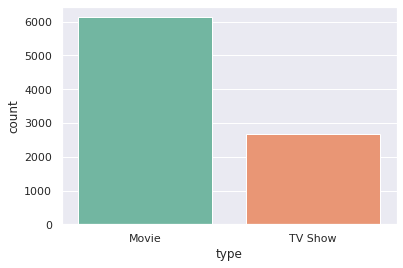

In [5]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

**Movie rating analysis:**

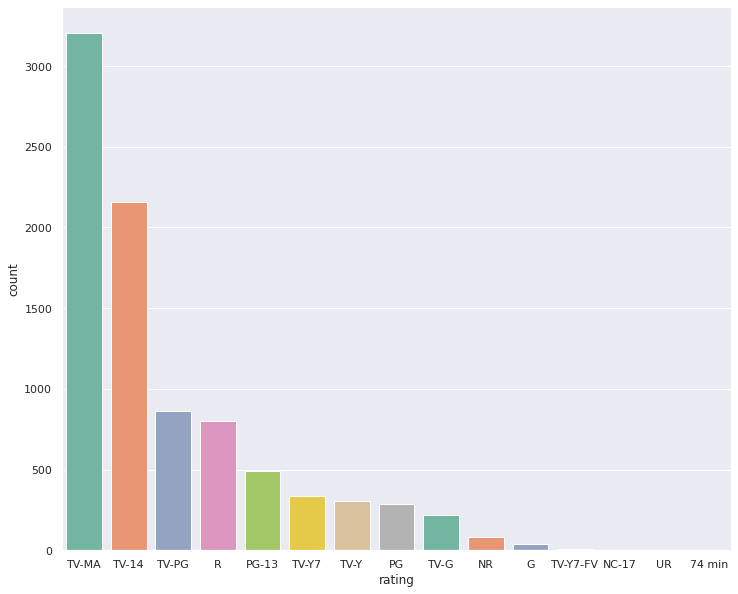

In [6]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

The largest count of movies are given 'TV-MA' rating that is a rating assigned by mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is TV-PG rating that stands for "Parental Guidance Suggested".

**Year wise analysis:**

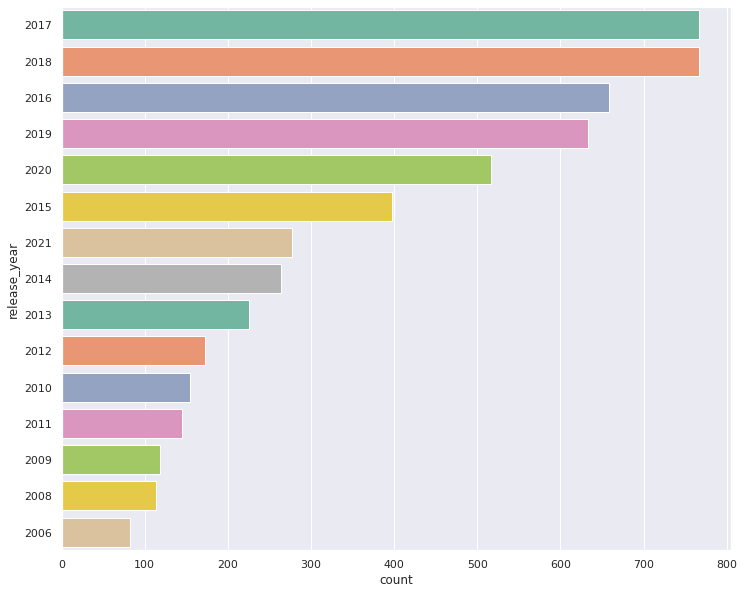

In [7]:
netflix_movies=df[df['type']=='Movie']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

Most of the movies were released in the years 2017 and 2018.

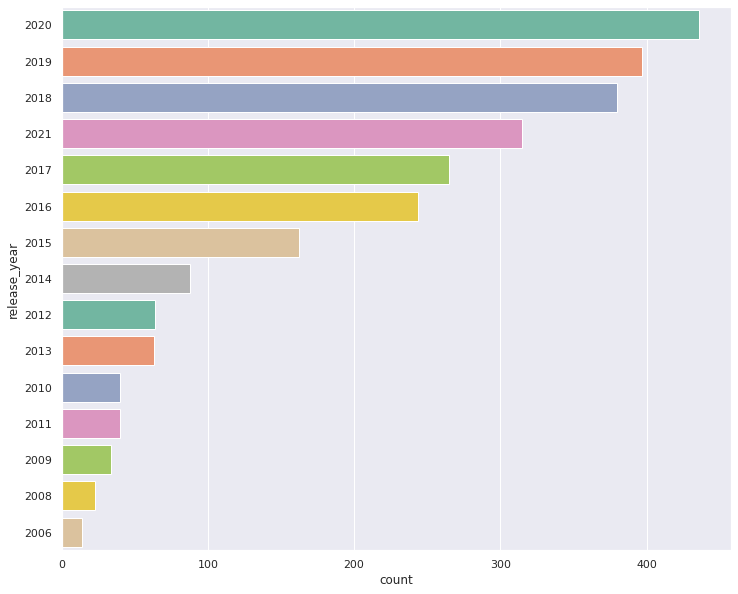

In [8]:
netflix_shows=df[df['type']=='TV Show']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

Most of the series were released in the year 2020

**TV shows with largest number of seasons:**

In [9]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<AxesSubplot:xlabel='title'>

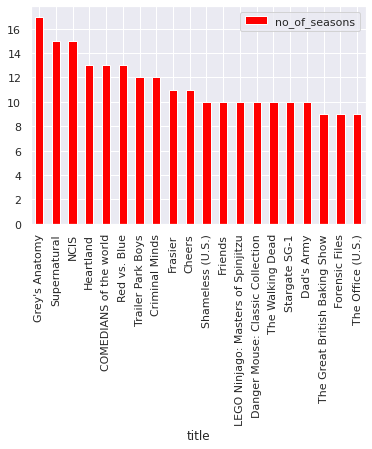

In [10]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

Grey's Anatomy has largest number of seasons

**Finding missing values:**

In [11]:
pd.DataFrame({'Total missing values':df.isna().sum(),
              'Percentage':(df.isna().sum()/len(df))*100})

,Total missing values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


# Preprocessing and Feature selection:

Recommendation based on the following columns:
- Type
- Director
- Rating
- Listed_in
- Description

In [12]:
new_df = df[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
new_df.set_index('title', inplace=True)
new_df.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


If you take a look at the missing values in this dataset, you will realize that the director column has 2634 NaN values which correspond with almost 30 percents of total data in that column. So, we can't just drop the NaN values because we will lose lots of movies to be given, instead we just fill the NaN values with empty string

In [13]:
new_df.fillna('', inplace=True)

In [14]:
# For director, cast, and listed_in
# Because there is more than 1 people and categories
# We don't want if people share the same first or last name consider the same person
# or the word that appear in many categories (TV, etc) consider the same category
def separate(texts):
    t = []
    for text in texts.split(','):
        t.append(text.replace(' ', '').lower())
    return ' '.join(t)

def remove_space(texts):
    return texts.replace(' ', '').lower()

def remove_punc(texts):
    return texts.translate(str.maketrans('','',string.punctuation)).lower()

In [15]:
new_df['type'] = new_df['type'].apply(remove_space)
new_df['director'] = new_df['director'].apply(separate)
new_df['cast'] = new_df['cast'].apply(separate)
new_df['rating'] = new_df['rating'].apply(remove_space)
new_df['listed_in'] = new_df['listed_in'].apply(separate)
new_df['description'] = new_df['description'].apply(remove_punc)

new_df.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirstenjohnson,,pg-13,documentaries,as her father nears the end of his life filmma...
Blood & Water,tvshow,,amaqamata khosingema gailmabalane thabangmolab...,tv-ma,internationaltvshows tvdramas tvmysteries,after crossing paths at a party a cape town te...
Ganglands,tvshow,julienleclercq,samibouajila tracygotoas samueljouy nabihaakka...,tv-ma,crimetvshows internationaltvshows tvaction&adv...,to protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,tv-ma,docuseries realitytv,feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,,mayurmore jitendrakumar ranjanraj alamkhan ahs...,tv-ma,internationaltvshows romantictvshows tvcomedies,in a city of coaching centers known to train i...


In [16]:
new_df['bag_of_words'] = ''

# Combine all the words into 1 column
for i, row in enumerate(new_df.iterrows()):
    string = ''
    for col in new_df.columns:
        if row[1][col] == '':
            continue
        else:
            string += row[1][col] + ' '
            new_df['bag_of_words'][i] = string.strip()

new_df.drop(new_df.columns[:-1], axis=1, inplace=True)

In [17]:
new_df.head()

,bag_of_words
title,
Dick Johnson Is Dead,movie kirstenjohnson pg-13 documentaries as he...
Blood & Water,tvshow amaqamata khosingema gailmabalane thaba...
Ganglands,tvshow julienleclercq samibouajila tracygotoas...
Jailbirds New Orleans,tvshow tv-ma docuseries realitytv feuds flirta...
Kota Factory,tvshow mayurmore jitendrakumar ranjanraj alamk...


# Content based filtering using TF-IDF 

**Using TF-IDF to represent the features of each item (e.g. movie or show) in the dataset, and recommend similar items to a user based on their preferences.**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_df['bag_of_words'])


In [20]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.00000000e+00, 6.51109225e-03, 2.51508724e-02, ...,
        1.22541028e-02, 2.30160299e-02, 3.60339526e-02],
       [6.51109225e-03, 1.00000000e+00, 1.02129814e-02, ...,
        1.37342009e-03, 0.00000000e+00, 7.44741025e-04],
       [2.51508724e-02, 1.02129814e-02, 1.00000000e+00, ...,
        7.23719722e-03, 7.21477380e-03, 4.24499407e-02],
       ...,
       [1.22541028e-02, 1.37342009e-03, 7.23719722e-03, ...,
        1.00000000e+00, 1.99475996e-02, 5.30430706e-03],
       [2.30160299e-02, 0.00000000e+00, 7.21477380e-03, ...,
        1.99475996e-02, 1.00000000e+00, 4.54842501e-03],
       [3.60339526e-02, 7.44741025e-04, 4.24499407e-02, ...,
        5.30430706e-03, 4.54842501e-03, 1.00000000e+00]])

In [21]:
final_df = df[['title', 'type']]

In [22]:
def recommendation(title, total_result=5, threshold=0.5):
    # Get the index
    idx = final_df[final_df['title'] == title].index[0]
    # Create a new column for similarity, the value is different for each title you input
    final_df['similarity'] = cosine_sim[idx]
    sort_final_df = final_df.sort_values(by='similarity', ascending=False)[1:total_result+1]
    
    # You can set a threshold if you want to norrow the result down 
    #sort_final_df = sort_final_df[sort_final_df['similarity'] > threshold]
    
    # Is the title a movie or tv show?
    movies = sort_final_df['title'][sort_final_df['type'] == 'Movie']
    tv_shows = sort_final_df['title'][sort_final_df['type'] == 'TV Show']
    
    if len(movies) != 0:
        print('Similar Movie(s) list:')
        for i, movie in enumerate(movies):
            print('{}. {}'.format(i+1, movie))
        print()
    else:
        print('Similar Movie(s) list:')
        print('-\n')
        
    if len(tv_shows) != 0:
        print('Similar TV_show(s) list:')
        for i, tv_show in enumerate(tv_shows):
            print('{}. {}'.format(i+1, tv_show))
    else:
        print('Similar TV_show(s) list:')
        print('-')

In [23]:
recommendation('Breaking Bad')

Similar Movie(s) list:
1. The Show
2. The Book of Sun

Similar TV_show(s) list:
1. Better Call Saul
2. Marvel's The Punisher
3. Dare Me


In [24]:
recommendation('Narcos')

Similar Movie(s) list:
-

Similar TV_show(s) list:
1. Narcos: Mexico
2. Wild District
3. El Cartel
4. Miss Dynamite
5. Cocaine Cowboys: The Kings of Miami


In [25]:
recommendation('Chappie')

Similar Movie(s) list:
1. Real Steel
2. District 9
3. 2036 Origin Unknown
4. Singularity
5. AlphaGo

Similar TV_show(s) list:
-


In [26]:
recommendation('Ganglands')

Similar Movie(s) list:
1. Earth and Blood
2. Chhota Bheem: The Rise of Kirmada
3. Paradise Beach
4. Bright

Similar TV_show(s) list:
1. The Eagle of El-Se'eed


# **COLLABORATIVE FILTERING:**

In [27]:
import pandas as pd
import random
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

**Randomly adding customer id and ratings(from 1 to 5) to above dataset to perform collaborative filtering.**

In [28]:
# load the dataset
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# create a new column with random natural numbers in a particular range
new_col = [random.randint(1,5) for _ in range(data.shape[0])]
data["ratingsnew"] = new_col

# save the new dataset
data.to_csv("/kaggle/working/new_dataset.csv", index=False)


In [29]:
new_col = [random.randint(1,100) for _ in range(data.shape[0])]
data["cust_id"] = new_col

# save the new dataset
data.to_csv("/kaggle/working/new_dataset.csv", index=False)


# Recommend with SVD (user-based)

* Train the algorithm on the whole dataset using the fit method.
* We evaluate the algorithm using 5-fold cross-validation and print the results for the root mean squared error (RMSE) and mean absolute error (MAE). 
* Once the model is trained, we can use it to make movie recommendations to users based on their ratings and viewing history.

In [30]:
# import libraries
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['cust_id', 'show_id', 'ratingsnew']], reader)

# define the algorithm
algo = SVD()

# evaluate the algorithm using cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# train the algorithm on the whole dataset
trainset = data.build_full_trainset()
algo.fit(trainset)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4258  1.4051  1.4295  1.4208  1.3982  1.4159  0.0121  
MAE (testset)     1.2283  1.2047  1.2313  1.2329  1.1982  1.2191  0.0146  
Fit time          0.54    0.54    0.55    0.54    0.54    0.54    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [31]:
# make recommendations for a particular user
cust_id = 3
items_to_predict = df.loc[~df.show_id.isin(trainset.ur[cust_id]), 'show_id']
testset = [[cust_id, item_id, 4.] for item_id in items_to_predict]
predictions = algo.test(testset)

# sort the predicted ratings in descending order and get the top recommendations
top_n = 10
recommended_items = [pred.iid for pred in sorted(predictions, key=lambda x: x.est, reverse=True)][:top_n]
recommended_items

['s4043',
 's5377',
 's7226',
 's6167',
 's5687',
 's1757',
 's6586',
 's6688',
 's3885',
 's1420']

# Recommend with Pearson's correlation (item-based)

* The system identifies items that are similar to the ones the user has liked in the past, based on their attributes. Here it predicts the rating of the selected item.
* In sim_options set user_based to False to indicate that we are using item-based collaborative filtering.
* Finally, we sort the predicted ratings and select the top recommended users based on their predicted ratings. 

In [32]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split

# Load the data from a file (in this case, a CSV file)
df = pd.read_csv('/kaggle/working/new_dataset.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['cust_id', 'show_id', 'ratingsnew']], reader)

# Split the data into a training set and a test set
trainset, testset = train_test_split(data, test_size=0.25)

# Use item-based collaborative filtering with KNNBasic algorithm
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Print the predicted ratings for each item in the test set
#predictions = algo.test(testset)
#for prediction in predictions:
    #print('Item ID:', prediction.iid, 'Predicted Rating:', prediction.est)
    
# Get the item ID from the user
item_id = "s3"

# Predict the rating for the selected item and print the result
item_inner_id = algo.trainset.to_inner_iid(item_id)
item_neighbors = algo.get_neighbors(item_inner_id, k=10)
item_neighbors = [algo.trainset.to_raw_iid(inner_id) for inner_id in item_neighbors]
item_ratings = []
for neighbor in item_neighbors:
    item_ratings.append(algo.predict(uid='user', iid=neighbor).est)
item_average_rating = sum(item_ratings) / len(item_ratings)
print("The predicted rating for item {} is {:.2f}.".format(item_id, item_average_rating))

Computing the cosine similarity matrix...
Done computing similarity matrix.
The predicted rating for item s3 is 3.02.


# HYBRID MODEL(Content and collaborative)

*  The content-based approach(KNN) is used to compute the cosine similarity matrix using description of shows.
*  The collaborative filtering approach is used to create a matrix factorization model using Singular Value Decomposition (SVD) to predict a user's show ratings based on the ratings of other similar users.
*  The output of this code is a list of recommended shows that combines both content-based and collaborative filtering approaches using a weighted average.

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans

# Load data
df = pd.read_csv('/kaggle/working/new_dataset.csv')

# Split data into train and test sets
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['cust_id', 'show_id', 'ratingsnew']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD algorithm
algo = SVD()
algo.fit(trainset)

# Train KNN algorithm
sim_options = {'name': 'cosine', 'user_based': False}
knn = KNNWithMeans(sim_options=sim_options)
knn.fit(trainset)

# Calculate TF-IDF vectors for movie descriptions
tfidf = TfidfVectorizer(stop_words='english')
df['description'] = df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['description'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Generate recommendations
def hybrid(cust_id, show_title):
    # Get index of movie
    idx = df.loc[df['title'] == show_title].index[0]

    # Calculate cosine similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort shows based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]

    # Get show indices
    show_indices = [i[0] for i in sim_scores]

    # Get show titles and similarity scores
    shows = df.iloc[show_indices][['show_id', 'title', 'type']]
    shows['similarity'] = [cosine_sim[idx][i] for i in show_indices]

    # Predict ratings using SVD algorithm
    shows['est'] = shows['show_id'].apply(lambda x: algo.predict(cust_id, x).est)

    # Predict ratings using KNN algorithm
    shows['est2'] = shows['show_id'].apply(lambda x: knn.predict(cust_id, x).est)

    # Calculate final ratings as a weighted average of the two predicted ratings
    shows['final_rating'] = 0.6 * shows['est'] + 0.4 * shows['est2']

    # Sort shows based on final ratings
    shows = shows.sort_values('final_rating', ascending=False)

    # Return top 10 recommended shows
    return shows.head(10)

# Generate recommendations for user with ID 3 and movie "Ganglands"
print(hybrid(3, 'Ganglands'))


Computing the cosine similarity matrix...
Done computing similarity matrix.
     show_id                              title     type  similarity  \
4024   s4025                    Triple Frontier    Movie    0.100763   
5305   s5306                             Narcos  TV Show    0.150355   
4885   s4886                               Ajji    Movie    0.099807   
424     s425  Chhota Bheem: The Rise of Kirmada    Movie    0.199226   
6740   s6741                              Farce    Movie    0.102428   
3552   s3553                    The Good Bandit  TV Show    0.108941   
8569   s8570                 The Young Vagabond    Movie    0.121704   
2549   s2550                         John Henry    Movie    0.112155   
6146   s6147                   American Odyssey  TV Show    0.101754   
8017   s8018                           Silencer    Movie    0.106676   

           est  est2  final_rating  
4024  3.018822   5.0      3.811293  
5305  2.809340   5.0      3.685604  
4885  2.742192   5.0

In [34]:
# Select the column containing the attribute
attr_col = df["title"]

# Filter the rows based on the attribute value
filtered_rows = df.loc[attr_col == "Moshe Kasher: Live in Oakland"]
#filtered_rows
#filtered_rows["show_id"]
#filtered_rows["description"]

# Conclusion:

* For content based filtering, **Earth and blood** is the top recommendation
* For collaborative filtering, **Blood and water** is the top recommendation
* For hybrid approach, **Moshe Kasher: Live in Oakland** is the top recommendation